# Linear Regression - Assignment 3 - Divya Kulkarni
## Section 1 - Loading Dataset

In [1]:
import pandas as pd
import seaborn as sns

### 1.1 Load the dataset into a dataframe named df.

In [2]:
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 20640
Number of Columns: 10


#### Observations: 
##### 1. df.shape[0] returns number of rows in the dataframe
##### 2. df.shape[1] returns number of columns in the dataframe

In [4]:
print("First 5 rows \n", df.head())

First 5 rows 
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
print("All columns titles",df.columns)
print("All column datatypes",df.dtypes)

All columns titles Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
All column datatypes longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [6]:
df['ocean_proximity'] = df.ocean_proximity.astype('category')
print(df.dtypes)

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object


#### Observations
##### 1. df.columns returns all the column headers
##### 2. df.dtypes returns all the column data types in which we have both numerical (float) and categorical (category) -> ocean_proximity columns
##### 3. As we can see that when we first print the datatypes the ocean_proximity datatype is object by changing it's type to category we now have both numerical for all of the columns (float64 ->float) and categorical values category for ocean_proximity

### 2.2 For all the numerical columns plot the histogram distribution and write your observations about them

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

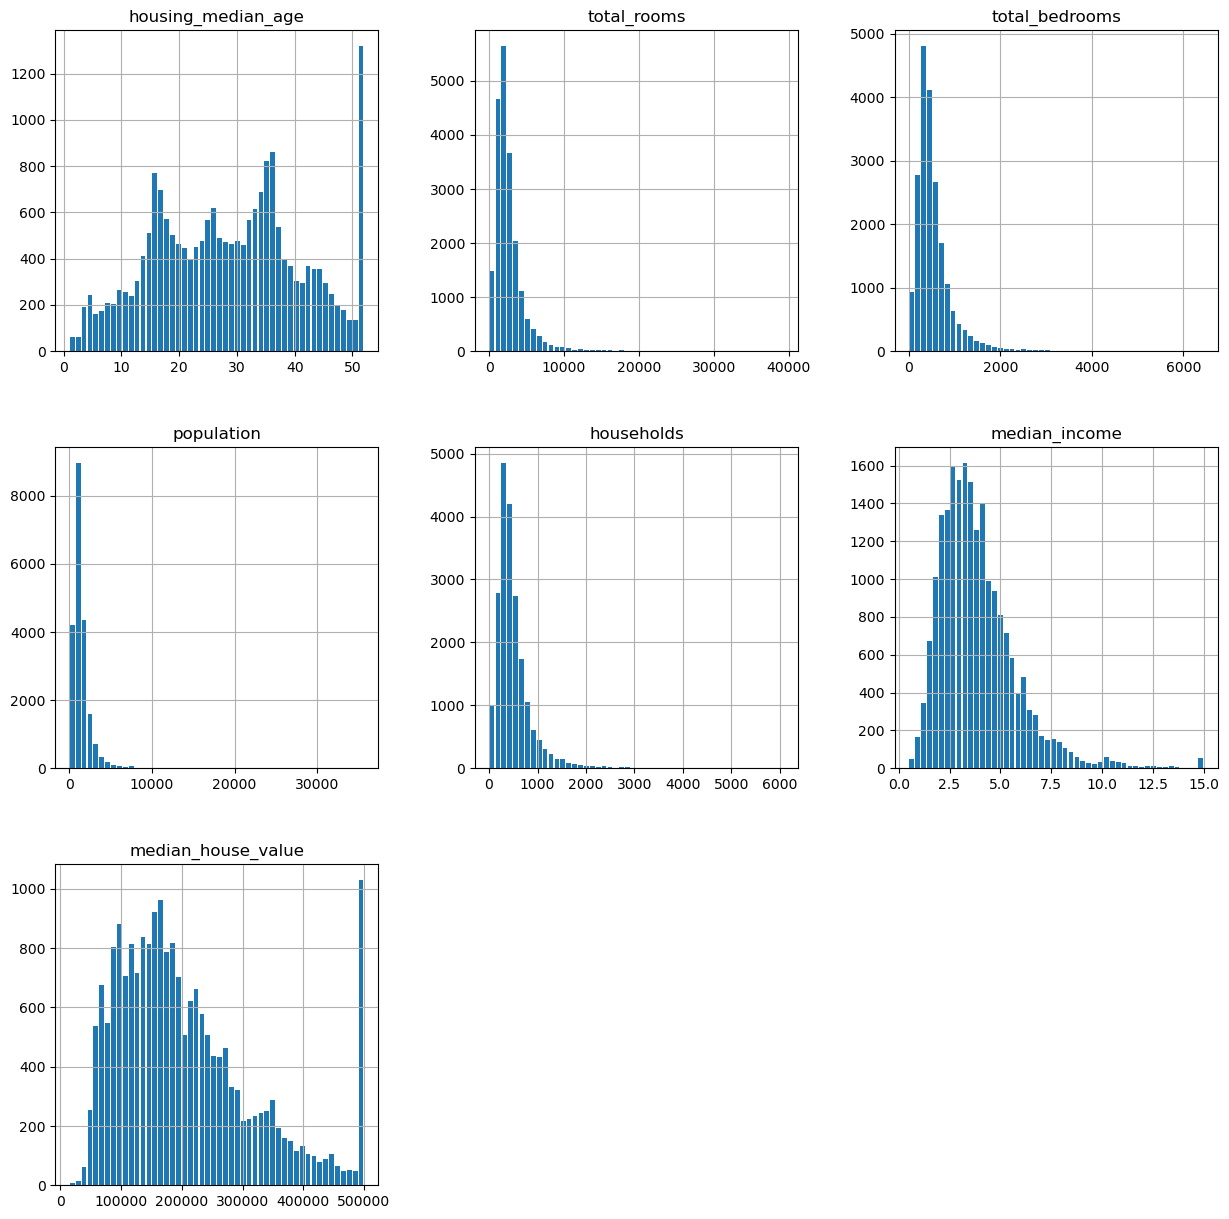

In [7]:
df.hist(column=df.columns[2:],bins=50,figsize=(15,15),rwidth=0.8)

#### Observations of above plot
##### 1. Outliers are present in housing_median_age and median_house_value 
##### 2. While total_rooms, total_bedrooms, population, households, median_income are of Right skewed

### 2.3 For all the numerical columns plot the box plots and check if there are outliers in any of thecolumn. (Except latitude and longitude)

<AxesSubplot:>

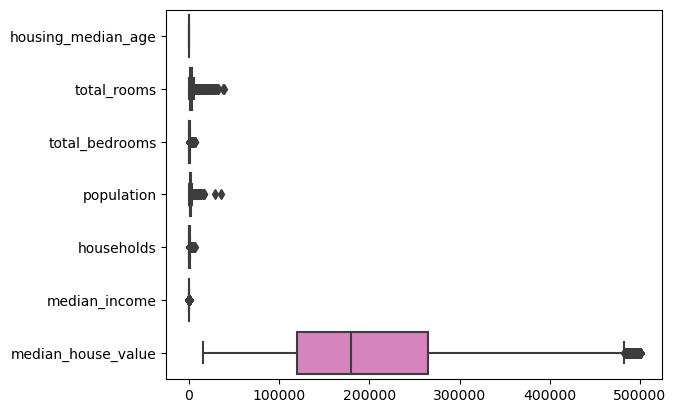

In [8]:
sns.boxplot(data=df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']], orient="h")

#### Observations
##### The outliers are present we can see that the columns have values outside the inter-quartile range and they exist above the upper quartile

In [41]:
import numpy as np

# Define the numerical columns to check for outliers
numerical_columns = [
    'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income', 'median_house_value'
]

# Create a dictionary to store the counts of outliers for each column
outlier_counts = {}

for column in numerical_columns:
    # Calculate Q1, Q3, IQR, upper limit, and lower limit
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Find outliers and count them
    outliers = df[column][(df[column] > upper_limit) | (df[column] < lower_limit)]
    outlier_counts[column] = len(outliers)

# Print the counts of outliers for each column
for column, count in outlier_counts.items():
    print(f"Number of outliers in {column} column: {count}")


Number of outliers in housing_median_age column: 0
Number of outliers in total_rooms column: 1287
Number of outliers in total_bedrooms column: 1306
Number of outliers in population column: 1196
Number of outliers in households column: 1220
Number of outliers in median_income column: 681
Number of outliers in median_house_value column: 1071


#### Observation
#### 1. housing_median_age and total_bedrooms do not have outliers
#### 2. total_rooms, population, households, median_income and have outliers

### 2.4 Plot a heatmap and check whether there is a correlation between different numericalfeatures. Also check the correlation of different features with the target feature median_house_value

<AxesSubplot:>

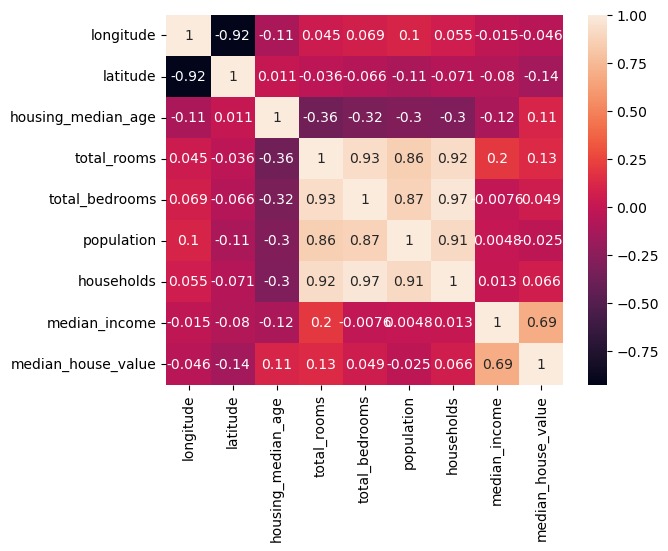

In [42]:
sns.heatmap(data=df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].corr(), annot=True)

#### Observation- We can observe that there is between correlation between the numerical columns because most of the values are closer to +1 and -1 

Text(0.5, 1.0, 'features correlating with median house value')

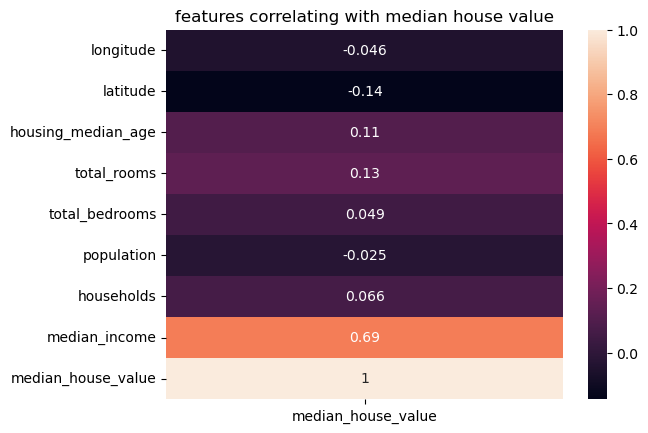

In [43]:
correlation_matrix = df.corr()['median_house_value']
data = pd.DataFrame(correlation_matrix)
heatmap=sns.heatmap(data, annot=True) 
heatmap.set_title('features correlating with median house value')

#### Observation- From above plot of median_house_values Vs longitude, latitude , housing_median_age ,'total_rooms,  total_bedrooms, population, households , median_income we can see that median_income is most correlated to median_house_values

### 2.5 Plot a barplot to check how many houses are in different subcategories of the feature ‘ocean_proximity'

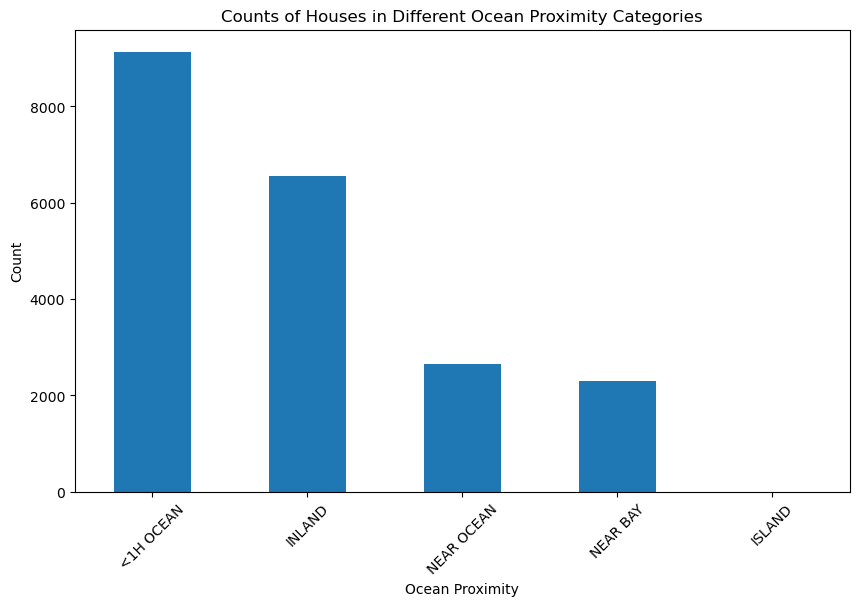

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame (replace 'housing.csv' with your CSV file)
df = pd.read_csv('housing.csv')

# Count the occurrences of each subcategory in the 'ocean_proximity' feature
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# Create a barplot to visualize the counts of houses in different 'ocean_proximity' categories
plt.figure(figsize=(10, 6))
ocean_proximity_counts.plot(kind='bar')
plt.title("Counts of Houses in Different Ocean Proximity Categories")
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Section 3 - Preprocessing the dataset

### 3.1 Find if there are any NaN values in the dataset.

In [45]:
# Check for NaN values in the entire DataFrame
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Observation - NaN exists in total bedrooms column

### 3.2 Impute the NaN values with the median value of the column.

In [46]:
# Impute NaN values with the respective column's median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
print("Number of NaN values presently", df.isnull().sum())

Number of NaN values presently longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#### Observation- We can see the NaN values are removed

### 3.3 Remove the outlier datapoints from the dataset

In [47]:
old_shape = df.shape
print("old shape of dataframe : ",old_shape)

def remove_outliers(data, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 *iqr
    outliers_list = df.index[(df[column_name] < lower) | (df[column_name] > upper)]

    return outliers_list

# Iterate through numerical columns and remove outliers
result =[]
for i in ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']:
    result.extend(remove_outliers(df,i))

# Now, 'df' contains dataset with outliers removed from all specified numerical columns
len(result)

old shape of dataframe :  (20640, 10)


6761

In [48]:
def cleaned_dataframe(df,lis):
    lis = sorted(set(lis))
    df = df.drop(lis)
    return df

In [49]:
cleaned_df = cleaned_dataframe(df,result)
cleaned_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [50]:
print("After removing outliers: ",cleaned_df.shape)

After removing outliers:  (17609, 10)


#### 3.4 Encode the categorical variable ocean proximity using Label encoder or One hot encoder

In [51]:
#Encode the categorical variable ocean proximity using Label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cleaned_df.ocean_proximity= label_encoder.fit_transform(cleaned_df.ocean_proximity)
cleaned_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [52]:
print(df['ocean_proximity'].unique())
print(df['ocean_proximity'].value_counts())
oneHotEncode = pd.get_dummies(df, columns = ['ocean_proximity'])
print(oneHotEncode)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39

#### Observation- Label encoding is good because only one column

## Section 4. Splitting the dataset

### 4.1 Store the values of median_house_value feature in a variable named ‘target’ and then drop the feature from the dataframe. After this step you should have shape of df as 20640 x 9

In [53]:
target=cleaned_df['median_house_value']
cleaned_df=cleaned_df.drop(['median_house_value'],axis=1)
print(target)
print(cleaned_df)

2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 17609, dtype: float64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43         

### 4.2 Split df into X_train and X_test with test ratio 0.2. Similar create y_train and y_test

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cleaned_df, target, test_size=0.2, random_state=42)

### 4.3 Plot histogram distribution of y_train and y_test and check whether they follow similar distribution

<AxesSubplot:>

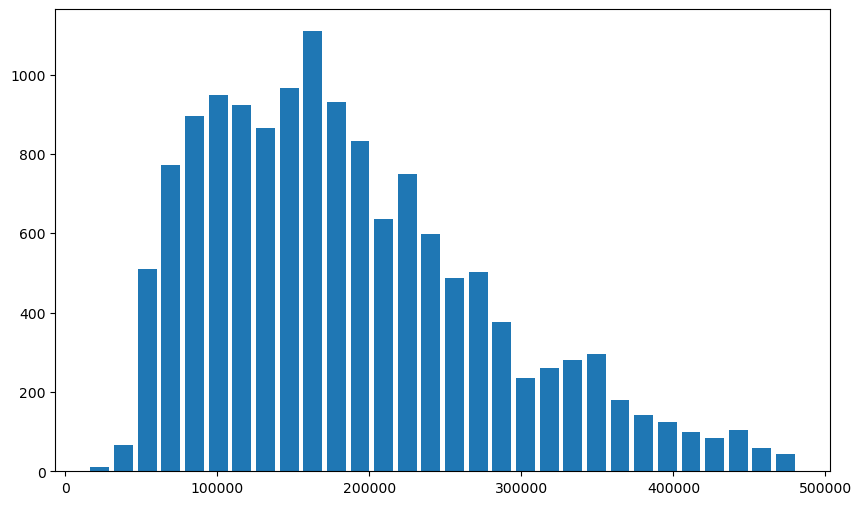

In [55]:
y_train.hist(bins=30, grid=False,figsize=(10, 6) ,label='y_train',rwidth=0.8)

<AxesSubplot:>

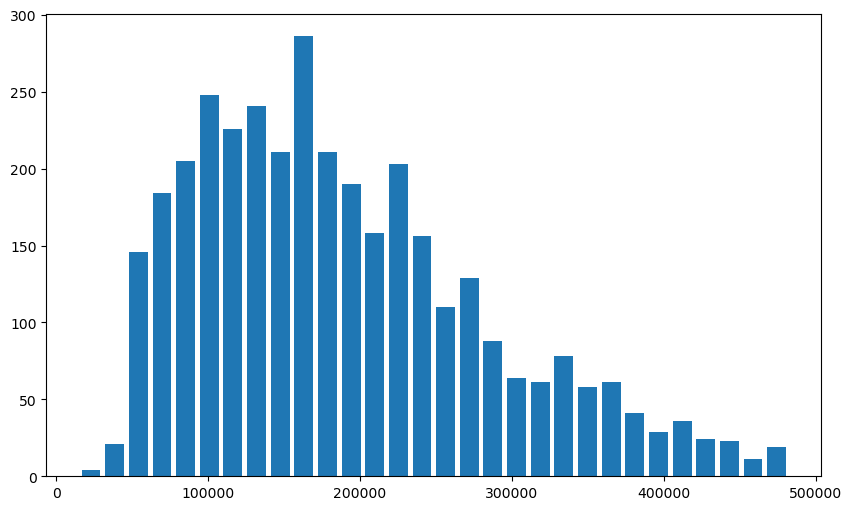

In [56]:
y_test.hist(bins=30, grid=False,figsize=(10, 6) ,label='y_train',rwidth=0.8)

#### Observation - From the above histogram we can see that the y_test and y_train have almost similar distribution i.e, increase and then decrease

## Section 5. Training the model

### 5.1 Define a Linear regression model and fit(train) the model only on train data

In [57]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred = LinearRegression.predict(x_test)

### 5.2 Compute the mean_squared_error and R square error on train_data and test_data for the model and write your observations on the performance of the model

In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np
mean_squared_error(y_test, y_pred)

3567164498.297478

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6101031080304096

#### Observation- The R-squared value of approximately 0.6101 suggests that the Linear Regression model explains about 61.01% of the variability in the test data, indicating moderate explanatory power

## Section 6. Feature importance and Feature selection

### 6.1 Find top 3 features which are most useful in predicting the median_house_value.

In [61]:
pd.DataFrame(LinearRegression.coef_, cleaned_df.columns, columns = ['Coeff'])

,Coeff
longitude,-38302.087416
latitude,-37935.350331
housing_median_age,952.789859
total_rooms,-16.661060
total_bedrooms,164.549586
population,-61.118954
households,107.238366
median_income,40898.020177
ocean_proximity,-1676.332045


#### Observation top 3 features based on Coefficient values are 
#### 1. median income
#### 2. housing median age  
#### 3. total bedrooms

### 6.2 Drop all other features and train your model using only these 3 features and compute the R square and mean_squared_error

In [62]:
cleaned_df=cleaned_df.drop(columns=['longitude','latitude','total_rooms','population','households','ocean_proximity'])
print(cleaned_df)

       housing_median_age  total_bedrooms  median_income
2                    52.0           190.0         7.2574
3                    52.0           235.0         5.6431
4                    52.0           280.0         3.8462
5                    52.0           213.0         4.0368
6                    52.0           489.0         3.6591
...                   ...             ...            ...
20635                25.0           374.0         1.5603
20636                18.0           150.0         2.5568
20637                17.0           485.0         1.7000
20638                18.0           409.0         1.8672
20639                16.0           616.0         2.3886

[17609 rows x 3 columns]


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_df , target , test_size=0.20)
LinearRegression = LinearRegression()
LinearRegression.fit(X_train , Y_train)

LinearRegression()

In [64]:
Y_pred = LinearRegression.predict(X_test)

In [65]:
r2_score(Y_test,Y_pred)

0.44430346171844004

In [66]:
mean_squared_error(Y_test,Y_pred)

4819699054.807939

### 6.3 Compare the performance of the original model (using all the features) with the current model.

#### Observation - The old model, with a mean squared error (MSE) of 3567164498.297478 and an R-squared (R2) value of 0.616, is better than the new model, which has an MSE of 4686824876.212994 and an R2 value of 0.453361411852338. This is because the old model has a lower MSE, indicating it makes more accurate predictions, and a higher R2 value, indicating it explains a larger proportion of the variance in the target variable